# Linear Regression

### Introduction to Notebook

***
In this notebook, I will explore the concepts of Linear Regression, its practical applications, and how it can be leveraged to make predictions based on data.

Our exploration is divided into three comprehensive sections:

**Section 1: Introduction to Linear Regression**
In this initial section, I will lay the groundwork by introducing the fundamental concepts of Linear Regression. We will understand how this statistical method forms the basis for predicting a target variable based on one or more predictor variables. By establishing a solid understanding of Linear Regression, I will set the stage for our subsequent investigations.  

**Section 2: Predicting Broad Jump Length from Weight in the NFL Combine**
In the second section, I delve into a practical case study that involves Linear Regression. I will utilize Python and its powerful libraries, such as Pandas, Matplotlib, Seaborn, and Scipy, to examine a dataset containing weight and broad jump length data of players from the NFL Combine in 2020. By employing Linear Regression techniques, I aim to uncover whether there exists a predictive relationship between a player's weight and their performance in the broad jump. Through code-driven analysis and visualization, I will explore the insights provided by this data.

**Section 3: Predicting NFL Touchdowns**
In the final section, I expand our horizons further by applying Linear Regression to predict a more complex outcome: NFL touchdowns. Building on the experience from the previous section, I will use Scikit-Learn, a powerful machine learning library, to process, clean, and analyze the data related to NFL touchdowns. By training a Linear Regression model, I will aim to predict the number of touchdowns a player(Quarterbacks specfically) will score based on various factors. This section showcases the broader applicability of Linear Regression to diverse datasets and predictive scenarios.







# Section 1: Introduction to Linear Regression
Simple linear regression serves as a tool to gauge the connection between two quantitative variables. This technique comes into play when you wish to uncover:

**Strength of Relationship:** This refers to the degree of association or correlation between two variables in a dataset. It quantifies how closely the values of one variable change in response to changes in another variable. For Example, in the context of NFL data analysis, I can examine the strength of the relationship between a player's weight and their broad jump length.

**Dependent Variable Value Estimation:** This involves using a regression model to predict or estimate the value of a dependent variable based on one or more independent variables. In linear regression, the goal is to fit a line (or hyperplane in higher dimensions) that best represents the relationship between the independent and dependent variables. Once the model is established, it can be used to estimate the value of the dependent variable for new or unseen data points. This process is particularly useful when you want to forecast an outcome based on known predictor variables.
For Example, in the context of NFL data analysis, estimating what quarterbacks will score the most touchdowns next year and how many will they score.

These regression models explain the interplay between variables by fitting a line to observed data. Linear regression opts for a straight line, while other forms like logistic and nonlinear regression employ curved lines. Essentially, regression empowers you to gauge the way a dependent variable changes in response to shifts in independent variable(s).

##### Assumptions of Simple Linear Regression

***

The foundation of simple linear regression lies on a few assumptions. These include:

**Homogeneity of Variance (Homoscedasticity):** The prediction error's size remains relatively constant across different independent variable values.

**Independence of Observations:** The dataset's observations are collected using statistically valid methods, devoid of concealed relationships among them.

**Normality:** The data conforms to a normal distribution.

**Linearity of Relationship:** The connection between the independent and dependent variables adheres to a linear pattern, manifesting as a straight line among data points rather than a curve or a grouping pattern.
Should the data fail to meet the criteria of homoscedasticity or normality, a nonparametric test such as the Spearman rank test could serve as a suitable alternative. Furthermore, if the data contradicts the assumption of independent observations (say, due to repeated observations over time), a linear mixed-effects model might be a better approach, accounting for the extra structure within the data.

##### Conducting a Simple Linear Regression Test

Here's a snapshot of the process:

**The Formula:** The formula for simple linear regression stands as follows:

y = β0 + β1X + ε

 - y represents the predicted dependent variable value (y) for any given independent variable value (x).
 - β0 signifies the intercept – the forecasted y value when x equals 0.
 - β1 indicates the regression coefficient, indicating how y changes as x increases.
 - x stands as the independent variable, exerting its influence on y.
 - ε denotes the estimation error, revealing the extent of variation in the regression coefficient estimate.
Finding the Best-Fit Line: Linear regression seeks the best-fit line by determining the regression coefficient (β1) that minimizes the overall model error (ε).

Although manual execution of linear regression is doable, it tends to be an extremly boring and labour intensive task. Most individuals leverage statistical software such as the python packages sckit-learn or scipy to efficiently analyze their data.[[1]](https://www.scribbr.com/statistics/simple-linear-regression/)

### Section 2: How Weight can Predict the Broad Jump of players in the NFL combine

In this section I am going to use linear regression on a csv file downloaded from kaggle[[1]]('https://www.kaggle.com/datasets/mrframm/nfl-2020-combine') that contains the data of the players that were invited to the 2020 NFL combine. I have tried doing regression models on NFL data before, however I never really got very far as there are so many variables that pridicting anything is a bit of a nightmare and it gets extremly complex very quickly. However for the purposes of this notebook and demonstration of simple regression I am going to clean a dataframe and simply determine if we can predict the Broad jump of a player based on his weight. (Broad jump is just another term for long jump...Americans)

In [1]:
# Import Pandas
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Statistical arrays
import numpy as np

#Statistical tools
import scipy.stats as ss

# Optimization
import scipy.optimize as so

In [2]:
# Read in the data
cb_data = pd.read_csv("./Data/NFL_Combine_2020.csv")

In [3]:
# Take a peek
cb_data.tail()

,Unnamed: 0,Player,Pos,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
332,332,D.J. Wonnum,DL,195,258,4.73,34.5,20.0,123.0,7.25,4.44
333,333,Dom Wood-Anderson,TE,193,261,4.92,35.0,NaN,119.0,NaN,NaN
334,334,David Woodward,LB,188,230,4.79,33.5,16.0,114.0,7.34,4.37
335,335,Chase Young,DL,195,264,NaN,NaN,NaN,NaN,NaN,NaN
336,336,Jabari Zuniga,DL,190,264,4.64,33.0,29.0,127.0,NaN,NaN


First thing I notice in the data is that some of the players have not taken part in each event as there are empty cells from my data (NaNs). Many of these player (especially the top athletes) do not participate in the combine as they do not need to - example above is Chase Young - in 2019/2020 he was a top recruit coming out of college so he did not take part in any events. For the purposes of this excercise I am going the exclude the data of any player that did not take part in the broad jump events. 

In [4]:
# Get original row count
print("No. of rows before NaNs removed: ", len(cb_data.index))

# Drop rows containing NaNs in 'Wt' or 'Broad Jump' columns
cb_data = cb_data.dropna(subset=['Wt', 'Broad Jump'])

# Get Row Count of players after cleaning
print("No. of rows after NaNs removed: ", len(cb_data.index))

No. of rows before NaNs removed:  337
No. of rows after NaNs removed:  239


Above I have removed the 98 players from the dataframe that did not have the neccessary data recorded for the investigation. 

In [5]:
#Look at a sample
cb_data

,Unnamed: 0,Player,Pos,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,0,Trey Adams,OL,203,318,5.60,24.5,NaN,92.0,NaN,NaN
1,1,Hakeem Adeniji,OL,193,302,5.17,34.0,26.0,115.0,NaN,NaN
3,3,Salvon Ahmed,RB,180,197,4.62,34.5,NaN,120.0,NaN,NaN
4,4,Brandon Aiyuk,WR,183,205,4.50,40.0,11.0,128.0,NaN,NaN
5,5,Cam Akers,RB,178,217,4.47,35.5,20.0,122.0,NaN,4.42
...,...,...,...,...,...,...,...,...,...,...,...
331,331,Charlie Woerner,TE,195,244,4.78,34.5,21.0,120.0,7.18,4.46
332,332,D.J. Wonnum,DL,195,258,4.73,34.5,20.0,123.0,7.25,4.44
333,333,Dom Wood-Anderson,TE,193,261,4.92,35.0,NaN,119.0,NaN,NaN
334,334,David Woodward,LB,188,230,4.79,33.5,16.0,114.0,7.34,4.37


### Plot the Data

***

Here I am going to create a scatter plot of the data.

In [6]:
# Create x and y data from data frame
x = cb_data['Wt'].tolist()
y = cb_data['Broad Jump'].tolist()


Text(0, 0.5, 'Jump Height (cm)')

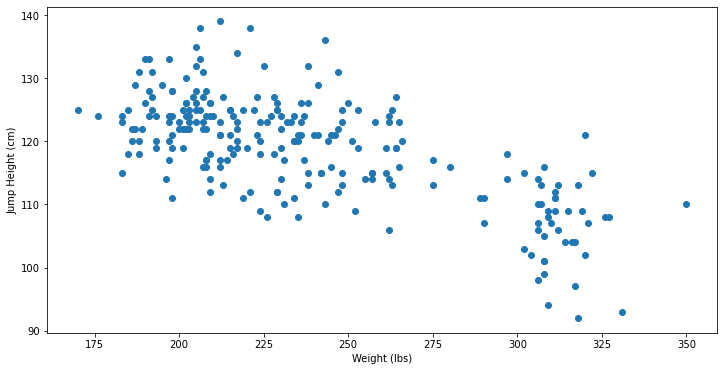

In [7]:
# Scatter plot
fig, ax = plt.subplots(figsize = (12,6))
plt.scatter(x,y)
plt.xlabel('Weight (lbs)')
plt.ylabel("Jump Height (cm)")

So here I can see that the data points are indicating a negative relationship between these two variables as the data points are on a downward trajectory from the top left to the bottom right of the plot. Or as the weight of a player increases, the shorter the jump tends to get.

Below I will use the linregress tool in scipy to get the pvalue of the data[[2]]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html'). This is to prove that the values of a players weight (x) is directly related to the players broadjump.  
The linregress function in the scipy.stats module is a convenient tool for performing linear regression analysis on a set of data points, it calculates several important parameters of the linear regression model, including the slope, intercept, correlation coefficient (r-value), p-value, and standard error.

In [8]:
res = ss.linregress(x, y)
print (res)

LinregressResult(slope=-0.13852410700081397, intercept=151.89883891940303, rvalue=-0.6900714858660851, pvalue=3.930794374293921e-35, stderr=0.009437140221157788, intercept_stderr=2.28167911217884)


After performing the linear regression analysis, the linregress function returns a LinregressResult object, which contains several statistical values that describe the linear regression model. Here I will go through some of the results we will use in our model. 

**pvalue:** This is the p-value associated with the null hypothesis that there is no significant linear relationship between the variables x and y. A small p-value (usually less than 0.05) indicates that the linear relationship is statistically significant. In the output, the pvalue is approximately 3.930794374293921e-35, which is extremely small (almost 0) and suggests a highly significant linear relationship.(This is not actually used in the model but the miniscule score gives creedence to generating a model.)

**slope:** This is the slope of the linear regression line, which represents the change in the dependent variable (y) for a unit change in the independent variable (x). In the output, the slope is approximately -0.1385.

**intercept:** This is the intercept of the linear regression line, which is the value of the dependent variable (y) when the independent variable (x) is zero. In the output, the intercept is approximately 151.8988.

Now using the results above I will create a the preditive data to fit the line.

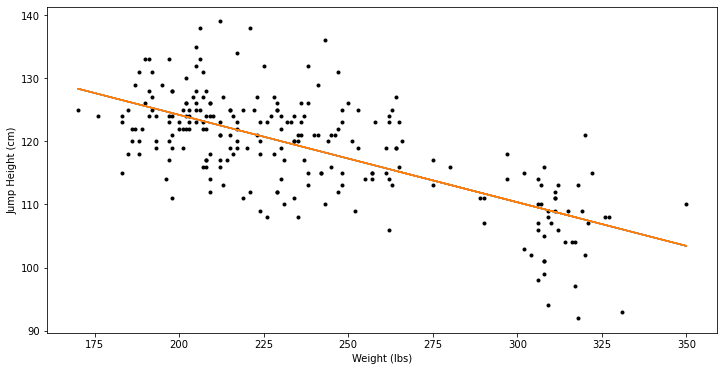

In [9]:
# Creating predictive data
y_pred = res.intercept + res.slope * np.array(x)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

# PLot x and predictive data(y_pred) on x
ax.plot(x, y_pred)

# x and y axis labels
plt.xlabel('Weight (lbs)')
plt.ylabel("Jump Height (cm)")

ax.plot(x,y_pred)

### Linear Regression using the polyfit function
Below I will do the same thing, except this time instead of creating a formula to fit the line, I will ask they polyfit function in the scipy library to do this for me. 

In [10]:
# To use the polyfit function the data needs to be in numpy arrays
x = np.asarray(x)
y = np.asarray(y)

# use x and y to find original parameters used to create data
params = np.polyfit(x, y, 1)
params

array([-1.38524107e-01,  1.51898839e+02])

The first value -1.38524107e-01  is the slope of the linear regression line. This value indicates the rate of change of the dependent variable (y) with respect to a unit change in the independent variable (x). In this case, as expected since we saw this above, the negative value suggests a negative correlation between x and y, meaning that as x increases, y tends to decrease.

The second value 1.51898839e+02 is the intercept of the linear regression line. It represents the value of the dependent variable (y) when the independent variable (x) is zero. In this case, it suggests that when x is zero, the predicted value of y is approximately 156.36.

The e notation in the values represents scientific notation. For example, 1.38524107e-01 is equivalent to -0.138524107, and 1.51898839e+02 is equivalent to 151.898839.  
You will notice these values are almost identical to the values returned to me when I ran the linregress function in the previous section (the slope and intercept outputs).  

In summary, the params array provided represents the coefficients of the linear regression line that best fits the data points (x, y). 
Both functions are attempting to achieve the same goal—fitting a linear regression line to the data and extracting the slope and intercept of that line. The slight numerical differences in the results might be due to different algorithms or methods used by the linregress and polyfit functions to perform the regression, but the essence of what they are doing is the same.  
The linear equation that describes this relationship is approximately:  
**y=−0.1385x+151.8988**  
This equation represents the best-fit line that has been determined through linear regression using my data. It indicates that for each unit increase in x, y is expected to decrease by approximately 0.1385 units, and when x is 0, y is expected to be approximately 151.8988.
This equation can be used to make predictions based on the given data and the fitted linear model.

Text(0, 0.5, 'Jump Height (cm)')

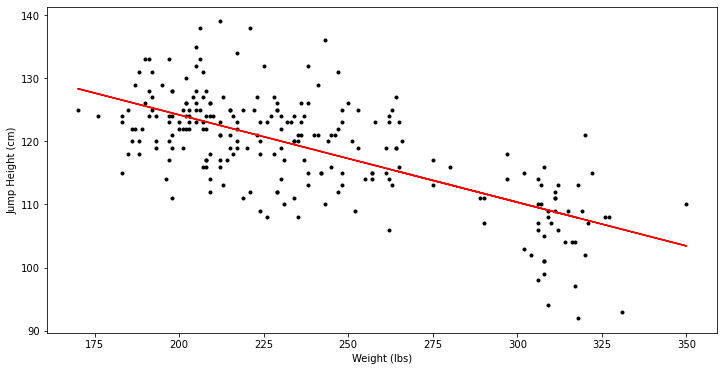

In [11]:
 # Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')


# PLot x and params on x
ax.plot(x, params[0] * x + params[1], 'r-')

# Labels
plt.xlabel('Weight (lbs)')
plt.ylabel("Jump Height (cm)")



Now realistically some context has to be put on this data. Theses are professional athletes, in the real world with "normal" people who do not train for hours almost every day the data may have a lot more varience. Plus, these are people, there does come a point of diminishing returns where if a person does not weigh enough they will not have the strength or power/energy to jump. In the plot above we may even see that point at roughly 190-200 lbs. If we had a lager sample with lighter athletes, it is very possible that the data would have a more "normal" or bell curve distribution rather than linear.  
Also in a larger sample that includes a broader range of individuals, including those who are not professional athletes, you might see more variation in the data. Again this variation could lead to a more bell-shaped distribution, reflecting the diverse range of physical abilities and training levels in the general population.  
Considering these factors, it's important to remember approach data analysis and modeling with a nuanced understanding of the domain being studying. While linear regression can provide valuable insights, it's not always the best fit for every situation. Exploring alternative models, such as polynomial regression, quadratic regression, or other curve-fitting methods, could help capture more complex relationships that exist in real-world data.

Below I have created a graph that allows a polynomial of degree 3 (It is now a cubic polynomial. 3 is just a default - users can play with this, just change the "deg" value below) to the given data points (x, y). This means that the polynomial will have significantly more flexibility and complexity, and it will try to match the fluctuations and details in the data.

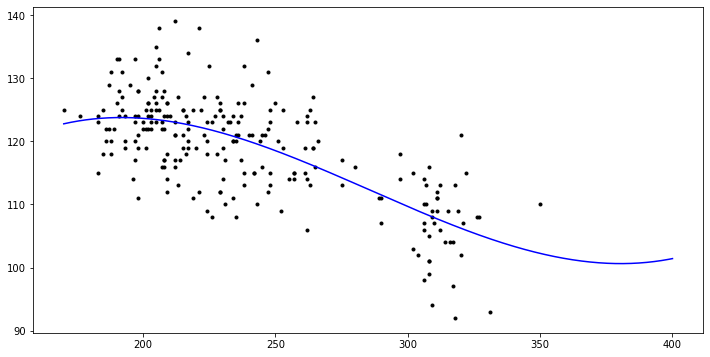

In [12]:
# Degrees of the polynomial(Freedom)
deg = 3

# Use x and y to try to find the original parameters
params = np.polyfit(x, y, deg)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

#plot x and y
ax.plot(x, y, 'k.')

# create temp x values
xtmp = np.linspace (170.0, 400.0, 1000)

# PLot x and params on x
ax.plot(xtmp, np.polyval(params, xtmp), 'b-')

When you increase the degree of the polynomial, it can capture intricate patterns and variations in the data, potentially resulting in a curve that passes very closely to each data point. However, there is a risk of overfitting, which means that the polynomial might capture noise in the data rather than the true underlying trend. This can lead to poor generalization when making predictions on new, unseen data.

The choice of the polynomial degree should be based on the complexity of the underlying relationship in the data and the goals of the analysis. There is a trade-off between fitting the data well and avoiding overfitting. In many cases, lower-degree polynomials are preferred to avoid overfitting, unless there is strong justification for using a higher degree polynomial.  
In the investigation I have done above into the relationship between an athletes weight and length of broad jump we can see how expanding the degrees of the polynomial gives a little bit of a more accurate picture in some ways as we can see the curve start to trend down as it approaches the y-axis, however contrary to that the blue line looks like it is begging to trend back up in as it is going away from the x-axis, and the likelyhood of anyone, even a pro athlete being able to jump highter the closer they get to 375lbs is not realistic. That last data point is a bit of an outlier that may be throwing off the model - anyone that is 350 lbs and can jump over 110 cms is a outlier. An outlier in a stable of outliers.  
In my opinion the cubic polynomial (deg = 3) gives the best "fit" as an illustration for a presentation, and also for analysis, as long as the presenter/analyset has a clear compreheshion and is able to explain the context and limitations of the data sample. 







# Section 3: Predict NFL Touchdowns

***

In this section, I will attempt to create a model that uses the play-by-play data from the 2021 season for training purposes. Subsequently, I will assess the accuracy of the model's predictions by applying it to the 2022 data.

In [13]:
# import required libaries

# Pandas for data manipulation and analysis
import pandas as pd

# Module to find pathnames matching a specified pattern
import glob

# Module for interacting with the operating system
import os

# NumPy for arrays, matrices, and mathematical functions
import numpy as np 

# Matplotlib for creating various types of plots and visualizations
import matplotlib.pyplot as plt

# Seaborn for statistical data visualization built on Matplotlib
import seaborn as sns 

# IPython widgets for creating interactive user interfaces
from ipywidgets import interact, interactive, fixed, Layout, Dropdown, widgets

# SciPy for mathematical, scientific, and engineering functions
from scipy import stats




In [14]:
# Read in multiple csv with same headings to 1 dataframe
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
path = '.\Data\Pred_data'
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

C:\Users\elyn\AppData\Local\Temp\ipykernel_21232\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\elyn\AppData\Local\Temp\ipykernel_21232\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\elyn\AppData\Local\Temp\ipykernel_21232\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,222,224,226,243,244,245,253,254,255,260,262,263,283,284,301) have mixed types. Specify d

### About the Data

The data that was imported here was play-by-play data. That means it is a detailed account of every individual play that occurs during a football game. It includes a chronological record of each play for the last 3 seasons, including information about the teams involved, the down and distance, the location on the field, the players on the field, the outcome of the play, and many other details.  
However, since a multitude of these records are tangential, at best, to the focus of our investigation, a process of analysis and refinement is required. This entails scrutinizing and "cleaning" the data, separating the relevant from the extraneous to ensure our study remains targeted and at least somewhat insightful.

In [15]:
# reset the index as each csv will have its own
df = df.reset_index(drop=True)

In [16]:
# Take a peek
df.sample(20)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
95455,4150,2021_18_LAC_LV,2022010915,LV,LAC,REG,18,LAC,away,LV,...,0,1,1.404862,NaN,NaN,NaN,NaN,NaN,0.991927,0.807309
72576,1344,2021_09_NYJ_IND,2021110400,IND,NYJ,REG,9,IND,home,NYJ,...,0,0,-0.024560,NaN,NaN,NaN,NaN,NaN,0.345410,-34.541044
117198,3329,2022_07_KC_SF,2022102310,SF,KC,REG,7,SF,home,KC,...,0,1,0.749949,0.360873,3.437385,2.0,0.998024,0.389405,0.610991,38.900894
140836,1538,2022_16_NYG_MIN,2022122405,MIN,NYG,REG,16,MIN,home,NYG,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,363,2020_01_IND_JAX,2020091305,JAX,IND,REG,1,JAX,home,IND,...,0,0,-0.316228,NaN,NaN,NaN,NaN,NaN,0.449766,-44.976604
53247,2392,2021_02_MIN_ARI,2021091909,ARI,MIN,REG,2,ARI,home,MIN,...,0,0,0.144331,1.210721,9.743556,8.0,0.489050,0.246076,0.467165,53.283513
120392,1885,2022_08_PIT_PHI,2022103008,PHI,PIT,REG,8,PIT,away,PHI,...,0,0,0.517686,0.910428,7.577063,6.0,0.561614,0.223387,0.551182,44.881785
102720,1334,2022_02_CHI_GB,2022091812,GB,CHI,REG,2,GB,home,CHI,...,0,1,-0.968714,NaN,NaN,NaN,NaN,NaN,0.773746,22.625375
31732,3598,2020_12_TEN_IND,2020112903,IND,TEN,REG,12,IND,home,TEN,...,0,0,1.099390,NaN,NaN,NaN,NaN,NaN,0.388795,-38.879499
102347,634,2022_02_ATL_LA,2022091807,LA,ATL,REG,2,ATL,away,LA,...,0,0,-0.631657,1.154327,7.760379,6.0,0.490616,0.224849,0.459611,54.038873


In [17]:
# See the shape of the dataframe
print(df.shape)

(149373, 372)


### Exploring and Grouping the data

***

As you can see this is a fairly large dataframe, in comparison to what I have been using up to now it is enormous. I will not be using all the data here to create my model so I will now begin cleaning and grouping the data I need. I will look through the column titles and find the colums with the data I want to analyze to see if there is a corrolation between that data and touchdown passess.

In [18]:
# list all columns in the dataframe 
df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

### Choosing the Statistics to consider

***

Below I wil now group the attributes I consider to be releavent to the data I am trying to output from my model. First I will group the players and their stats by the position I am interested in, Quarterback. 
The following code sets up the statistics to be analyzed for quarterbacks (qb_stats) and specifies the criteria by which the data should be grouped for aggregation (groupby_stats).

In [19]:
# Quarterback statistics to consider
qb_stats = [
    'season', 'passer_id', 'passer', 'pass', 
    'complete_pass', 'interception', 
    'sack', 'yards_gained', 'touchdown', 'qb_dropback', 'wind'
]

In [20]:
# Grouping criteria
groupby_stats = [
    'season', 'passer_id', 'passer'
]

Now I will group and aggregate quarterback statistics, then select a random sample of 10 player-season combinations for display, providing a glimpse into the aggregated data.







In [21]:

# Group by and aggregate by sum
qb_df = df[qb_stats].groupby(groupby_stats, as_index=False).sum()

# Randomly sample 10 player-seasons
random_sample = qb_df.sample(n=10)

# Display the random sample
print(random_sample)

     season   passer_id       passer  pass  complete_pass  interception  sack  \
98     2020  00-0035282      E.Stick     1            1.0           0.0   0.0   
240    2021  00-0036946       K.Mond     3            2.0           0.0   0.0   
332    2022  00-0036322  J.Jefferson     4            3.0           0.0   0.0   
41     2020  00-0031260     L.Thomas     1            1.0           0.0   0.0   
78     2020  00-0034177      T.Boyle     1            0.0           0.0   1.0   
273    2022  00-0032156    T.Siemian    29           15.0           1.0   2.0   
114    2020  00-0036355    J.Herbert   684          396.0          10.0  32.0   
67     2020  00-0033466   I.McKenzie     1            1.0           0.0   0.0   
236    2021  00-0036898      D.Mills   466          263.0          10.0  31.0   
35     2020  00-0030506      T.Kelce     2            1.0           0.0   0.0   

     yards_gained  touchdown  qb_dropback    wind  
98            4.0        0.0          1.0     0.0  
240 

Aggregating statistics in the context of data analysis refers to the process of summarizing and condensing data values within groups.  
The selected subset of columns are grouped by the columns listed in groupby_stats. It groups the data into distinct groups based on unique combinations of values in the specified columns.  

First as an example, I will take a single attribute of that I am almost certain has a strong impact on if a touchdown is scored, that is **yards_gained**. 

### Analyze a Single Influence

***

In [22]:
# List of variables to analyze correlation with touchdowns
variables_to_analyze = ['yards_gained']
variable = 'yards_gained'


As evidence before I begin fitting the data I will genterate the correlation coefficent, or r-value. The correlation coefficient (r-value) measures the strength and direction of a linear relationship between two variables. The value of the correlation coefficient can range from -1 to 1:

 - If the correlation coefficient is close to 1, it indicates a strong positive linear relationship, meaning that as one variable increases, the other tends to increase as well.  
 - If the correlation coefficient is close to -1, it indicates a strong negative linear relationship, meaning that as one variable increases, the other tends to decrease.  
 - If the correlation coefficient is close to 0, it indicates a weak or no linear relationship between the variables.

In [23]:
# Calculate correlation coefficient
correlation_coefficient = qb_df['touchdown'].corr(qb_df[variable])

#Show result
correlation_coefficient

0.9686882136686202

The correlation coefficient of approximately 0.97 indicates a strong positive linear relationship between these two variables. This means that as the number of yards gained increases, the number of touchdowns tends to increase as well. 
Now I am going to use the linregress function in scipy,stats to calculate the parameters needed to define a linear regression line that best fits the data. 

In [24]:
# Fit a linear regression line
slope, intercept, r_value, p_value , std_err = stats.linregress(qb_df['touchdown'], qb_df[variable])
print('Slope = ', slope)
print('Intercept = ', intercept)
print('r_value = ', r_value)
print('p_value = ', p_value)
print('std_err = ',  std_err)

Slope =  125.4770725641528
Intercept =  130.44860595846012
r_value =  0.9686882136686199
p_value =  4.3000417337668435e-218
std_err =  1.7021140132676573


From this information I can now create the regression line. This line creates the equation of the linear regression line using the calculated slope and intercept. The equation is y = mx + b, where y is the predicted value (in this case, qb_df['ysrds_gained']), x is the input (qb_df['touchdown']), m is the slope, and b is the intercept.

Also it should be noted the p-value is a measure of the evidence against a null hypothesis (the hypothesis that there's no relationship between the variables). A very small p-value (4.3e-218 in this case) suggests strong evidence against the null hypothesis, indicating that the relationship between 'touchdown' and 'yards_gained' is statistically significant. Also standard error value of 1.702 is relatively small, which suggests that the estimated slope of the regression line is reliable. A smaller standard error indicates that the data points are relatively close to the regression line, meaning that the line provides a good fit to the data.

The slope of the regression line was calculated to be approximately 125.48. This value represents the estimated change in yards gained for every additional touchdown. It indicates that, on average, an increase of one touchdown is associated with an increase of around 125.48 yards gained.  

The intercept of the regression line was determined to be approximately 130.45. This value represents the estimated yards gained when there are no touchdowns. In other words, even without any touchdowns, quarterbacks are estimated to gain around 130.45 yards.  

By multiplying the slope with qb_df['touchdown'] and adding the intercept, I get the predicted y-values for each x-value. These predicted values form the points on the regression line, which can then be plotted to visualize how well the line fits the data.

In [25]:
# Get the regression line
regression_line = slope * qb_df['touchdown'] + intercept

#Show predicted y values for each X-value
regression_line

0      6655.256379
1      3518.329565
2       130.448606
3      4898.577363
4      3518.329565
          ...     
354    2263.558840
355    1134.265186
356     757.833969
357     381.402751
358     130.448606
Name: touchdown, Length: 359, dtype: float64

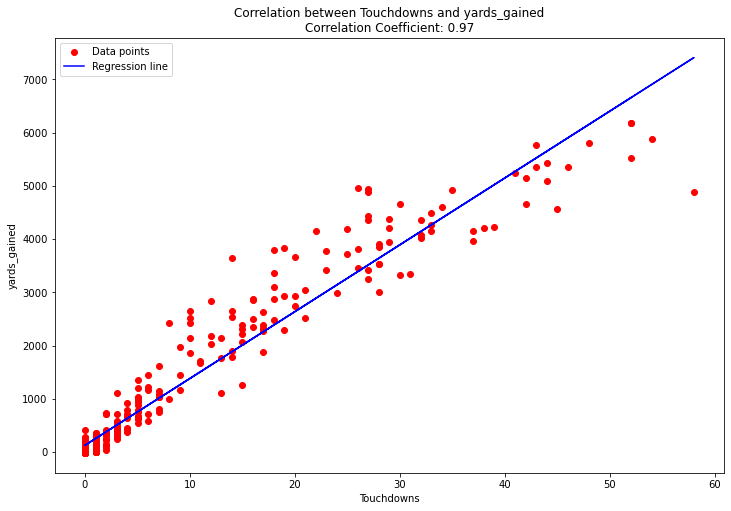

In [26]:
#Plot the data
plt.figure(figsize=(12, 8))  # Set figsize
# Create scatter plot
plt.scatter(qb_df['touchdown'], qb_df[variable], color='red', label='Data points')

#plot the regression line
plt.plot(qb_df['touchdown'], regression_line, color='blue', label='Regression line')

plt.title(f"Correlation between Touchdowns and {variable}\nCorrelation Coefficient: {correlation_coefficient:.2f}")
plt.xlabel('Touchdowns')
plt.ylabel(variable)
plt.legend()
plt.show()

The scatter plot displays the data points in red, with each point representing a quarterback's touchdowns and corresponding yards gained. The blue regression line is fitted to the data points using the calculated slope and intercept. This line serves as a predictive model for estimating yards gained based on the number of touchdowns.
The analysis and visualisation indicate a strong positive correlation between the number of touchdowns and the yards gained by quarterbacks. The regression analysis and visualization provide valuable insights into the relationship between these variables and offer a predictive model for estimating yards gained based on touchdown counts.

### Exploring Multiple Influences

***

While I could certainly analyze each potentially influential factor separately to understand their impact on scoring touchdown passes, there's a more efficient approach. The seaborn library offers a plotting tool called regplot() that not only creates these graphs with regression lines but also allows me to add interactivity. This allows me to use a dropdown to select the specific factor I want to analyze, streamlining the exploration process.

In [27]:
# List of variables to analyze correlation with touchdowns
variables_to_analyze = ['yards_gained', 'complete_pass', 'pass', 'interception', 'sack', 'qb_dropback', 'wind']

# Define layout for centering the dropdown
centered_layout = Layout(display='flex', justify_content='center')

@interact(variable=variables_to_analyze, width=(6, 20), height=(4, 12), layout=centered_layout)
def plot_correlation(variable, width, height):
    plt.figure(figsize=(width, height))  # Set figsize
    
    # Set scatter plot properties (dots red)
    scatter_kws = {'color': 'red'}
    # Set regression line properties (line blue)
    line_kws = {'color': 'blue'}
    
    sns.regplot(data=qb_df, x='touchdown', y=variable, scatter_kws=scatter_kws, line_kws=line_kws)
    
    # Calculate correlation coefficient
    correlation_coefficient = qb_df['touchdown'].corr(qb_df[variable])
    
    # Calculate p-value
    slope, intercept, r_value, p_value, std_err = stats.linregress(qb_df['touchdown'], qb_df[variable])
    
    plt.title(f"Correlation between Touchdowns and {variable}\nr-value: {correlation_coefficient:.2f}, p-value: {p_value:.2e}")
    plt.xlabel('Touchdowns')
    plt.ylabel(variable)
    plt.show()

interactive(children=(Dropdown(description='variable', options=('yards_gained', 'complete_pass', 'pass', 'inte…

In Seaborn, the sns.regplot() function is used to create a scatter plot with a regression line fit through the data points. It allows the user to visually explore the relationship between two variables and estimate the linear relationship between them. The main purpose of regplot is to provide insights into the correlation and trend between two variables, and thankfully it does the linear regression function and fits the line for me.

Each dot corresponds to a specific data instance (e.g., a player-season in the dataset).  
 - The x-coordinate of each dot represents the number of touchdowns scored by the player in that season.  
 - The y-coordinate of each dot represents the value of the selected variable (e.g., yards gained, completed passes, etc.) for the same player-season.  
 
The blue line is a linear regression line that best fits the scatter plot's data points.  
It represents the general trend or relationship between the two variables: touchdowns and the selected variable.
 - The slope of the line indicates the change in the selected variable's value as the number of touchdowns changes.
 - If the line has a positive slope, it suggests that higher touchdowns are associated with higher values of the selected variable. Conversely, a negative slope indicates an inverse relationship.

The shaded blue section around the regression line represents the range within which the actual regression line is likely to fall with a certain level of confidence.  
 - It indicates the uncertainty in the estimated regression line due to the variability in the data points.
 - The wider the shaded blue section, the greater the uncertainty in the regression line's position. Conversely, a narrower shaded section indicates higher confidence in the regression line's position.

### Summary of Analysis

**Yards Gained:** As expected, there is a strong positive correlation (r-value: 0.97) between the number of touchdowns and the yards gained by quarterbacks. The p-value is exceedingly small (p-value: 4.3e-218), indicating a highly significant relationship.

**Complete Passes:** A strong positive correlation (r-value: 0.95) is observed between touchdowns and the number of completed passes. The relationship is statistically significant (p-value: 9.06e-190).

**Pass Attempts:** The number of pass attempts shows a strong positive correlation (r-value: 0.95) with touchdowns, though the relationship is statistically significant (p-value: 3.96e-178).

**Interceptions**(QB Throws the ball to the other team): The correlation coefficient is approximately 0.85. This strong positive r-value suggests a significant positive linear relationship between the number of touchdowns and the number of interceptions. As the number of touchdowns increases, the number of interceptions tends to increase as well. The calculated p-value is approximately 5.88e-100. This very small p-value provides compelling evidence against the null hypothesis, confirming the statistical significance of the relationship between touchdowns and interceptions.The calculated slope suggests that an increase in touchdowns corresponds to an increase in interceptions, although the magnitude of this increase is relatively small.

**Sacks**(Tackled before throwing the ball): The correlation coefficient is approximately 0.83. This strong positive r-value indicates a notable positive linear relationship between the number of touchdowns and the number of sacks. As the number of touchdowns increases, the number of sacks tends to increase as well. This was surprising to me as I would have thought that the more a player was sacked the less oppertunaties they would have to throw a touch down. However on the other hand, if you are sacked you are almost certainly the quarterback as they attempt vast vast majority of passes, so there is a corrolation there.  The calculated p-value is approximately 2.10e-91. This extremely small p-value provides compelling evidence against the null hypothesis, confirming the statistical significance of the relationship between touchdowns and sacks.

**Quarterback Dropbacks**(The movement a quarterback makes by taking a few steps backward from the position where the ball starts the play): This strong positive r-value(.95) indicates a significant positive linear relationship between the number of touchdowns and the number of quarterback dropbacks. As the number of touchdowns increases, the number of dropbacks tends to increase as well.The calculated p-value is approximately 8.83e-178. This extremely small p-value provides compelling evidence against the null hypothesis, confirming the statistical significance of the relationship between touchdowns and quarterback dropbacks.


**Wind Conditions:** This moderate positive r-value (0.62) indicates a positive linear relationship between the number of touchdowns and wind conditions. However, the strength of this relationship is moderate compared to the other variables analyzed.The calculated p-value is approximately 3.53e-40. This small p-value provides compelling evidence against the null hypothesis, confirming the statistical significance of the relationship between touchdowns and wind conditions. Also it is clear from the wind plot that the standard error of the slope is much larger than in the other plots, its value is approximately 3.83. This value indicates the variability of the estimated slope, suggesting some uncertainty in the slope estimate.  Because the strength of this relationship is moderate I will exclude this factor from the next section.

So from this analysis knowing yards gained, completed passes, attempted passes, interceptions, and sacks all correlate with touchdowns. Let's see if this is the case for next seasons touchdown.  


### Analysis for the Next Season:

***

Now I will analyze the correlations of these statistics with next season's touchdowns by creating a copy of the original quarterback dataframe and increment the 'season' values by 1 to represent the next season.  
What we are really looking for here is to investigate if what a player did last season, does that corrolate to what they will do the next season. I am looking for year over year trends.  
The original and modified dataframes are merged to create a new dataframe ('new_qb_df') that will contain both the statistics for the current season and the corresponding statistics for the next season.
The code will again generates similar scatter plots and regression lines for the 'new_qb_df' dataframe to analyze the correlations between the statistics from the current season and the statistics from the next season, specifically in relation to next season's touchdowns.
For each statistic, it creates a scatter plot with 'touchdowns' on the x-axis and the corresponding predicted statistic from the next season on the y-axis.

In [28]:
# Create a copy of the qb_df DataFrame
_df = qb_df.copy()

# Increment the values in the 'season' column of the copied DataFrame by 1
_df['season'] = _df['season'].add(1)

# Merge the original qb_df with the modified _df based on specified columns
new_qb_df = qb_df.merge(_df, on=['season', 'passer_id', 'passer'], suffixes=('', '_prev'), how='left')

# Display a random sample of 10 rows from the merged DataFrame
new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,qb_dropback,wind,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev,qb_dropback_prev,wind_prev
121,2021,00-0022824,A.Lee,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,1.0,0.0
331,2022,00-0036313,B.Mann,2,1.0,0.0,0.0,17.0,0.0,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,2022,00-0033280,C.McCaffrey,2,1.0,0.0,0.0,34.0,1.0,2.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2020,00-0030520,M.Glennon,196,111.0,5.0,9.0,1034.0,7.0,193.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,2020,00-0035752,C.Streveler,21,11.0,1.0,2.0,95.0,2.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,2021,00-0023459,A.Rodgers,641,386.0,4.0,35.0,4234.0,39.0,609.0,0.0,697.0,428.0,6.0,25.0,4877.0,58.0,659.0,6192.0
102,2020,00-0035652,R.Finley,43,17.0,2.0,9.0,124.0,1.0,43.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,2022,00-0036355,J.Herbert,832,502.0,10.0,41.0,4944.0,27.0,805.0,590.0,791.0,443.0,15.0,31.0,5089.0,44.0,745.0,0.0
197,2021,00-0034418,C.Wilson,3,3.0,0.0,0.0,88.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,23.0,1.0,2.0,0.0
219,2021,00-0035710,D.Jones,436,232.0,7.0,22.0,2419.0,10.0,406.0,0.0,549.0,280.0,10.0,45.0,2833.0,12.0,516.0,3004.0


Now I have a new dataframe with previous season information, I can look at year to year corrolation. Did the variable in the previous year help predict the touchdowns for the following season.  

Lets analyze the data using regplot() again,

In [29]:
variables_to_analyze = ['touchdown_prev', 'yards_gained_prev', 
                        'complete_pass_prev', 'pass_prev', 
                        'interception_prev', 'sack_prev', 'qb_dropback_prev']

centered_layout = widgets.Layout(display='flex', justify_content='center')

@interact(y=variables_to_analyze, width=(6, 20), height=(4, 12), layout=centered_layout)
def plot_interactive_correlation(y, width, height):
    plt.figure(figsize=(width, height))  # Set figsize
    
    scatter_kws = {'color': 'red'}  # Set scatter plot properties (dots red)
    line_kws = {'color': 'blue'}    # Set regression line properties (line blue)
    
    
    # Check if standard deviations are not too close to zero
    if new_qb_df['touchdown'].std() > 1e-10 and new_qb_df[y].std() > 1e-10:
        sns.regplot(data=new_qb_df, x='touchdown', y=y, scatter_kws=scatter_kws, line_kws=line_kws)
        plt.title(f"Correlation between Touchdowns and {y}")
        plt.xlabel('Touchdowns')
        plt.ylabel(y)
        plt.show()
    else:
        print("Insufficient variability in data for p-value calculation.")

interactive(children=(Dropdown(description='y', options=('touchdown_prev', 'yards_gained_prev', 'complete_pass…

You can probably notice here that lines do not "fit" as cleanly as they did for the in season analysis. For example the corrolations on the data for interceptions or sacks is relativly weak and the confidence level (the shaded blue section), is wider in many of the graphs indicating greater uncertainty in the regression line's position. The narrower shaded section in the in-season analysis indicates higher confidence in the regression line's position. There does seem to be some corrlation in the year to year data so I will continue to use the data in the upcoming Machine Learning section.

### Machine learning

***

##### Steps in my machine learning approach include:

**Simple Linear Model:**
I begin by constructing a simple linear model. This model captures the relationship between two variables with a straight line, serving as an intuitive starting point for understanding correlations.

**Training and Testing Split:**
My method involves training the model using data from a preceding year and then testing it on data from the following year. This split helps  assess the model's ability to predict outcomes for unseen data and identifies any discrepancies or patterns.  
The crucial point to grasp is the necessity for unbiased evaluation when employing these measures, as it allows for accurate assessment of the model's predictive performance and validation.
This implies that you cannot appraise the model's predictive capability using the same data that was utilized for training. It's essential to evaluate the model using new, unseen data. Achieving this involves dividing your dataset prior to utilization.  
*In other words you dont want to test on the data you train on as you get overfit models.*  
 - Link to tutorial on Train Test Split (Youtube): https://www.youtube.com/watch?v=fwY9Qv96DJY  
 - Link to tutorial on Train Test Split (Real Python): https://realpython.com/train-test-split-python-data/  

**Out-of-Sample Test Results:**
The test phase provides us with a set of out-of-sample test results. These results demonstrate how well our trained model predicts real-world outcomes beyond its training data. This evaluation allows us to gauge the model's generalization capabilities.

**Visualization and Basic Stats:**
Visual representations of the model's predictions and actual outcomes help us comprehend the alignment or disparities between the two. Additionally, basic statistics, such as correlation coefficients and root mean square error, further illustrate the model's performance.

In [30]:
# Let's load in machine learning and stats packages

# Importing LinearRegression class from scikit-learn for creating linear regression models
from sklearn.linear_model import LinearRegression 

# This function calculates the mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error

# This function calculates the Pearson correlation coefficient and its p-value
from scipy.stats import pearsonr

In [31]:
# Peek at data to be trained
new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,qb_dropback,wind,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev,qb_dropback_prev,wind_prev
250,2022,00-0026197,C.Henne,9,5.0,0.0,0.0,23.0,1.0,9.0,42.0,18.0,11.0,0.0,0.0,86.0,0.0,17.0,0.0
187,2021,00-0033869,M.Trubisky,9,6.0,1.0,0.0,65.0,0.0,9.0,0.0,372.0,218.0,8.0,19.0,2299.0,19.0,366.0,1836.0
105,2020,00-0035752,C.Streveler,21,11.0,1.0,2.0,95.0,2.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,2021,00-0034577,K.Allen,22,12.0,0.0,2.0,115.0,1.0,22.0,0.0,107.0,60.0,1.0,7.0,594.0,6.0,100.0,199.0
35,2020,00-0030506,T.Kelce,2,1.0,0.0,0.0,4.0,0.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,2020,00-0032009,A.Humphries,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,2022,00-0033949,J.Dobbs,78,40.0,2.0,6.0,408.0,3.0,77.0,312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2020,00-0033319,N.Mullens,364,211.0,12.0,19.0,2310.0,15.0,349.0,832.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,2021,00-0031237,T.Bridgewater,494,285.0,7.0,31.0,2942.0,20.0,475.0,0.0,592.0,340.0,11.0,31.0,3802.0,18.0,560.0,4257.0
186,2021,00-0033856,L.Fournette,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# We will "train" our data on one season and "test"on the next season. 
# Train Test Splitting codebasics tutorial https://www.youtube.com/watch?v=fwY9Qv96DJY

# Let's use the previous season performance as
# our features for our model 
features = ['pass_prev', 'complete_pass_prev', 
            'interception_prev', 'sack_prev',
            'yards_gained_prev', 'touchdown_prev']

In [33]:
# We are predicting "current" season touchdowns 
target = 'touchdown' 

In [34]:
# Let's make a subset of data that has 
# no null values
model_data = (new_qb_df.dropna(subset=features+[target]))
model_data

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,qb_dropback,wind,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev,qb_dropback_prev,wind_prev
120,2021,00-0019596,T.Brady,879,544.0,13.0,29.0,5799.0,48.0,848.0,0.0,824.0,482.0,15.0,27.0,5522.0,52.0,777.0,5578.0
121,2021,00-0022824,A.Lee,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,1.0,0.0
122,2021,00-0022924,B.Roethlisberger,738,419.0,10.0,40.0,3724.0,25.0,695.0,0.0,743.0,446.0,14.0,13.0,4213.0,38.0,699.0,5233.0
123,2021,00-0023459,A.Rodgers,641,386.0,4.0,35.0,4234.0,39.0,609.0,0.0,697.0,428.0,6.0,25.0,4877.0,58.0,659.0,6192.0
124,2021,00-0023682,R.Fitzpatrick,9,3.0,0.0,1.0,13.0,0.0,8.0,0.0,312.0,183.0,8.0,14.0,2152.0,13.0,297.0,2454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2022,00-0036945,J.Fields,469,192.0,11.0,55.0,2527.0,21.0,443.0,2455.0,374.0,159.0,10.0,36.0,1973.0,9.0,349.0,0.0
345,2022,00-0036971,T.Lawrence,764,439.0,13.0,31.0,4663.0,30.0,731.0,3649.0,704.0,359.0,17.0,32.0,3641.0,14.0,668.0,0.0
346,2022,00-0036972,M.Jones,521,288.0,11.0,34.0,2883.0,16.0,498.0,1024.0,640.0,376.0,15.0,31.0,3904.0,28.0,607.0,0.0
347,2022,00-0037012,T.Lance,39,15.0,1.0,2.0,200.0,0.0,37.0,0.0,94.0,41.0,2.0,4.0,688.0,5.0,87.0,0.0


In [35]:
# train on 2021 data  
train_data = (model_data
              .loc[model_data['season']==2021])

In [36]:
# test on 2022 data (data the model hasn't seen)
test_data = (model_data
             .loc[model_data['season']==2022])

In [37]:
# initialize the linear regression
model = LinearRegression()

In [38]:
# fit, or "train", the model on the training data
model.fit(train_data.loc[:, features], 
          train_data[target])

LinearRegression()

In [39]:
# predict on the test data 
preds = model.predict(test_data.loc[:, features])

#Take a peek
preds

array([ 3.95263010e+01,  1.52047241e+00,  4.16063505e+01,  2.33503773e+01,
        5.06638496e+00,  2.16109543e+00,  4.84332750e+00,  3.24491592e+01,
        3.79180589e+00,  6.81015394e+00,  2.16474950e+00,  3.55248391e+00,
        5.87874316e+00,  4.92436522e+00,  2.80908148e+01,  4.32576099e+00,
        3.49530442e+01,  1.74590250e+01,  1.52047241e+00,  7.79909974e+00,
        2.27667451e+01,  3.02123186e+01,  2.16257906e+01,  1.26947514e+01,
        1.70556905e+01,  1.01367400e+01,  1.51806570e+00,  3.54125037e+00,
        1.60500430e+00,  1.52047241e+00,  3.14582046e+01,  1.95916013e+00,
        3.49997420e+01,  2.15225895e+01,  9.49814487e+00,  1.02652607e+00,
        2.62602099e+00,  5.45415433e+00,  4.58691394e+00,  1.52047241e+00,
        3.74184027e-01,  4.37730745e+01,  1.55275847e+00,  1.79743309e+00,
       -3.66803698e+00, -2.44631142e+00,  2.33755949e+00,  2.92637421e+00,
        1.81263760e+00,  1.83659523e+01,  1.67409459e+01,  3.61716861e+01,
        1.05763300e+01,  

In [40]:
# set an index so predictions match the correct rows
preds = pd.Series(preds, index=test_data.index)

In [41]:
# join the predictions back to your test dataset
test_data.loc[:, 'preds'] = preds

C:\Users\elyn\AppData\Local\Temp\ipykernel_21232\1552545952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'preds'] = preds


#### Quality of Prediction

***

**mean_squared_error** calculates the mean squared error (MSE) between the actual touchdown values (test_data['touchdown']) and the predicted touchdown values (test_data['preds']).  
The exponent **0.5 is then applied to the calculated MSE. This effectively takes the square root of the MSE, resulting in the root mean squared error (RMSE). RMSE is a common metric used to measure the average magnitude of the errors between predicted and actual values. A lower RMSE indicates a better fit of the model to the data.  
**pearsonr** calculates the Pearson correlation coefficient between the actual touchdown values (test_data['touchdown']) and the predicted touchdown values (test_data['preds']).  
**[0]** extracts the first element of the result tuple, which is the Pearson correlation coefficient itself.  
The exponent **2 is applied to the correlation coefficient. This yields the coefficient of determination, often denoted as R-squared (r2). R-squared represents the proportion of the variance in the dependent variable that's predictable from the independent variable(s). It provides insight into how well the model's predictions align with the actual data.  
Finally, the **print()** statement outputs the calculated RMSE and R-squared values for evaluation and analysis. These metrics offer a quantitative assessment of how well the model's predictions match the actual touchdown values in the test dataset.

In [42]:
# Let's run some basic statistics to examine the
# quality of the prediction

rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 7.464889311315496
r2: 0.6833791689242648


**RMSE (Root Mean Squared Error):** The RMSE value is approximately 7.46. This metric measures the average magnitude of the differences between the predicted and actual touchdown values. Lower RMSE values indicate better model performance, as they signify that the model's predictions are closer to the actual values.

**R-squared:** The R-squared value, which is approximately 0.68, signifies the portion of the variability found in the actual touchdown values that the model's predictions are able to explain. When the R-squared value approaches 1, it implies that the model's predictions closely align with the real values. Alternativly, when the value is closer to 0, it indicates that the model's predictions are relatively less accurate in explaining the observed outcomes. 

In summary, an RMSE of 7.46 and an R-squared of 0.68 provide insights into the model's performance. While the RMSE indicates the average prediction error, the R-squared shows the percentage of variance captured by the model's predictions. Further analysis and comparison with other models or benchmarks would help further interpret the significance of these values in the context of this model.  
From the values provided I would not be running into Paddy Power to put my wages on any of its predictions just yet.

### Analyze the models output

***

Below I will now plot the data from the trained and tested data. The plot will visualize the relationship between actual touchdowns ('touchdown' column) and predicted touchdowns ('preds' column) for a set of players. For clarity I have added a "for" loop that iterates over each row (player) in the 'top_players' dataframe and annotates the corresponding data point on the scatter plot with the top 20 player's name. I will alson output a list that provides insights into the performance of NFL quarterbacks in terms of touchdowns and the accuracy of the predictive model's touchdown predictions. 

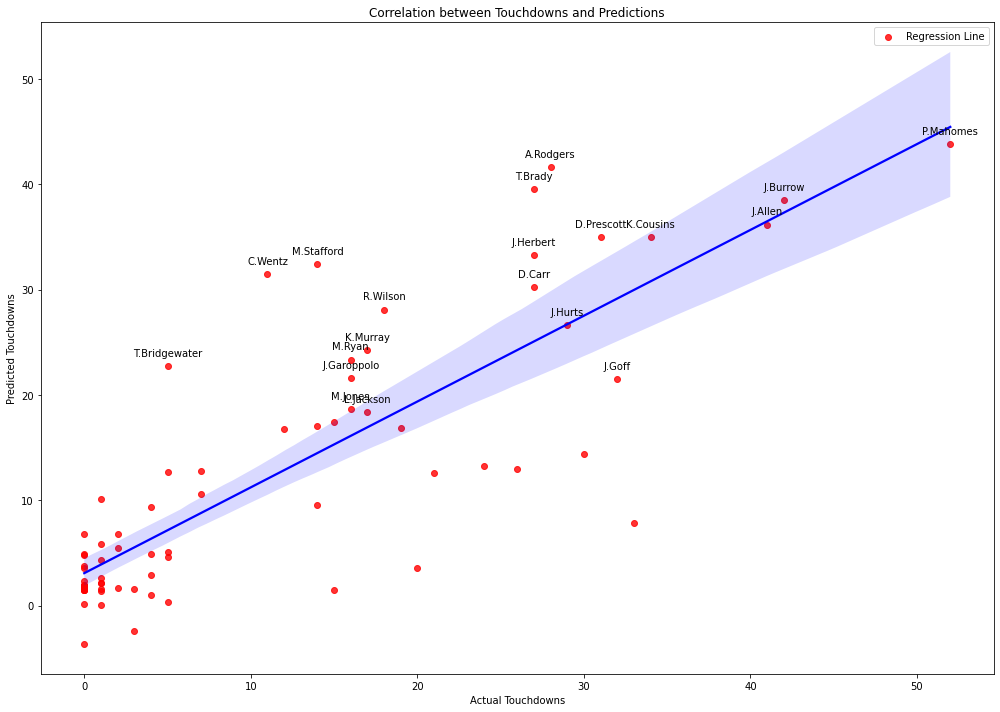

In [43]:
# Set figsize
plt.figure(figsize=(14, 10))  

# Plot properties
scatter_kws = {'color': 'red'}  
line_kws = {'color': 'blue'}    

# Create the scatter plot
sns.regplot(data=test_data, x='touchdown', y='preds', scatter_kws=scatter_kws, line_kws=line_kws)

# Annotate the top 20 predicted touchdown scorers with their names
top_players = test_data.nlargest(20, 'preds')
for _, row in top_players.iterrows():
    plt.annotate(row['passer'], (row['touchdown'], row['preds']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Correlation between Touchdowns and Predictions')
plt.xlabel('Actual Touchdowns')
plt.ylabel('Predicted Touchdowns')
plt.legend(['Regression Line'])

# Prevent overlapping annotations
plt.tight_layout()  

#Show Plot
plt.show()


In [44]:
# display the top 20 NFL quarterbacks based on the number of actual touchdowns scored ('touchdown')
# and their corresponding predicted touchdowns ('preds')
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).head(20)

,season,passer_id,passer,touchdown,preds
296,2022,00-0033873,P.Mahomes,52.0,43.773075
338,2022,00-0036442,J.Burrow,42.0,38.465752
310,2022,00-0034857,J.Allen,41.0,36.171686
262,2022,00-0029604,K.Cousins,34.0,34.953044
265,2022,00-0030565,G.Smith,33.0,7.799100
284,2022,00-0033106,J.Goff,32.0,21.522589
283,2022,00-0033077,D.Prescott,31.0,34.999742
345,2022,00-0036971,T.Lawrence,30.0,14.429281
336,2022,00-0036389,J.Hurts,29.0,26.656970
247,2022,00-0023459,A.Rodgers,28.0,41.606350


### Refrences
1. https://www.scribbr.com/statistics/simple-linear-regression/
2. https://realpython.com/train-test-split-python-data/
3. https://www.youtube.com/watch?v=fwY9Qv96DJY